# 미분

$\frac{d f(x)}{d x} = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}$

- 여기서 극한을 풀어 정확한 값을 계산하면 해석적 미분
- h를 적당히 0에 가까운 수로 두면 수치 미분
- 수치 미분은 오차가 있음

In [10]:
import numpy as np
import matplotlib.pylab as plt

# 잘못된 구현
# float32가 표현가능한 수의 범위는 약 -3.4 x 10^38부터 3.4 x 10^38까지
def numerical_diff_bad_example(f, x):
    h = 1e-50
    return (f(x + h) - f(x)) / h

print(np.float32(1e-50))
print(np.float32(1e-50) == 0.0)

Matplotlib is building the font cache; this may take a moment.


0.0
True


In [7]:
# 개선
def numerical_diff_bad_wip(f, x):
    h = 1e-4 # 0.0001
    return (f(x + h) - f(x)) / h

# 1e-4 정도면 수치미분에서 좋은 결과를 얻을 수 있다고 알려져 있음

In [8]:
# 중앙차분을 이용해 오차 줄이기
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2 * h)

# 왜 전방차분보다 중앙차분이 더 정확하다는 거지?
# 책에서는 그래프로 때우고 있음... 근데 이것도 직관적이지 않음
# https://chatgpt.com/share/680dd628-f29c-800a-b84b-92f87e9bce74
# 루트가 설명해준다고 함 (아마?)

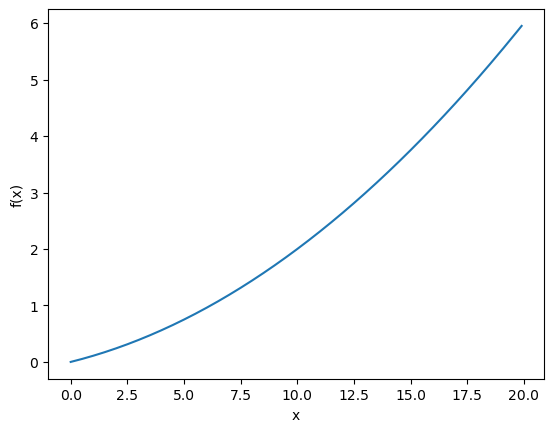

In [ ]:
# 수치미분 예시
def function_test_1(x):
        return 0.01 * x ** 2 + 0.1 * x

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 수로 이뤄진 배열 (20은 안들어감)
y = function_test_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()


0.1999999999990898


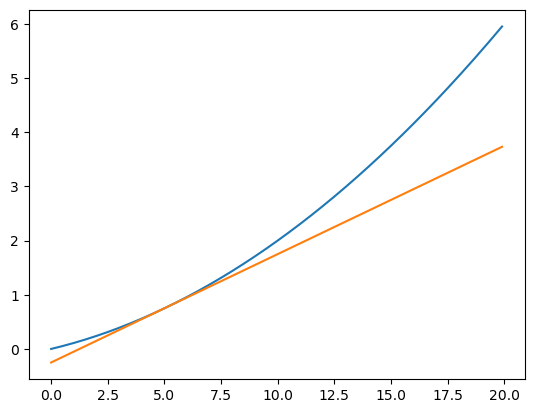

0.2999999999986347


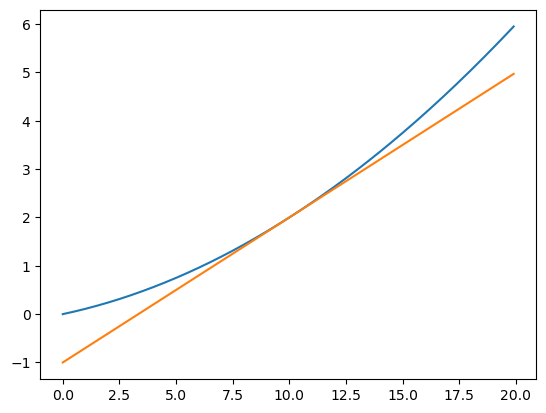

In [15]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

# x = 5일 때 수치미분
tf = tangent_line(function_test_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

# x = 10일 때 수치미분
tf = tangent_line(function_test_1, 10)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()


## 편미분

$f(x_0, x_1) = x_0^2 + x_1^2$를 미분하려면 어떻게 할까?

- 어느 변수에 대한 미분인지를 정한다.
- 다른 변수는 상수처럼 취급한다.

In [ ]:
def function_test_2(x):
    return x[0] ** 2 + x[1] ** 2

# Q. x_0 = 3, x_1 = 4일 때, x_0에 대한 편미분 rf/rx_0을 구하라
def function_tmp1(x0):
    return x0 * x0 + 4.0 ** 2.0
ans1 = numerical_diff(function_tmp1, 3.0)
print(ans1) # 해석적 미분 결과는 6

# Q. x_0 = 3, x_1 = 4일 때, x_1에 대한 편미분 rf/rx_1을 구하라
def function_tmp2(x1):
    return 3.0 ** 2.0 + x1 * x1
ans2 = numerical_diff(function_tmp2, 4.0)
print(ans2) # 해석적 미분 결과는 8

6.00000000000378
7.999999999999119
